In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('Diabetes Prediction.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

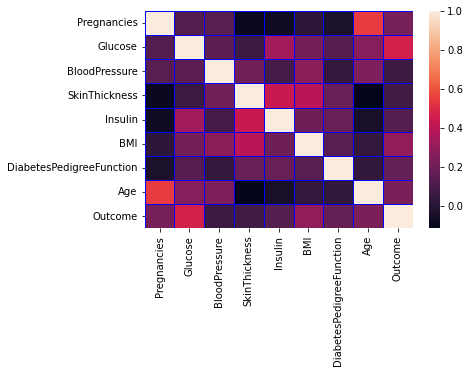

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,linecolor="blue",linewidth=1)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
x = df.drop(["Outcome"],axis =1)
y = df["Outcome"]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [8]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,0,0,0,0.0,0.256,25
9,8,125,96,0,0,0.0,0.232,54
249,1,111,86,19,0,30.1,0.143,23
22,7,196,90,0,0,39.8,0.451,41
221,2,158,90,0,0,31.6,0.805,66
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train

array([[-1.15089159, -0.86604199, -4.08050348, ..., -4.23580399,
        -0.62318423, -0.68917954],
       [ 1.30008124,  0.10264252,  1.50624649, ..., -4.23580399,
        -0.69179919,  1.79962799],
       [-0.84451998, -0.33482791,  0.92429337, ..., -0.24830436,
        -0.94624635, -0.86082143],
       ...,
       [ 1.91282444, -0.64730678,  0.92429337, ...,  1.80505924,
         1.89269781,  0.4264928 ],
       [-1.15089159,  0.60260872, -4.08050348, ...,  1.38113901,
        -0.76899103, -0.34589574],
       [-1.15089159,  0.10264252,  1.50624649, ..., -1.2551149 ,
        -0.60603049, -1.03246333]])

In [37]:
ann = tf.keras.models.Sequential()

In [38]:
# ann.add(tf.keras.layers.Dense(units=11, activation='relu'))

In [39]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [40]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [41]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [42]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

In [43]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [44]:
# ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [45]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [46]:
ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
ann.fit(x_train, y_train, batch_size = 3, epochs = 15)

Epoch 1/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7783
Epoch 2/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7761
Epoch 3/15
154/154 [==============================] - 1s 3ms/step - loss: 0.5177 - accuracy: 0.7761
Epoch 4/15
154/154 [==============================] - 1s 3ms/step - loss: 0.5122 - accuracy: 0.7848
Epoch 5/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7870
Epoch 6/15
154/154 [==============================] - 1s 4ms/step - loss: 0.5112 - accuracy: 0.7870
Epoch 7/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7826
Epoch 8/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7848
Epoch 9/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7870
Epoch 10/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7870

In [54]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 4ms/step


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7662337662337663